Ukraine War analaysis based on speech of Head of governments

Importing The Required Libraries

In [ ]:
import pandas as pd
import re
import string
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [ ]:
interview = pd.read_excel('Speech.xlsx')
interview.head()

,Head of Country,Speech
0,Joe Biden,"6:16 P.M. CET\n\nTHE PRESIDENT: Thank you, th..."
1,Emmanuel Macron,"Speaker 1: (00:00)\nOkay, Emmanuel Macron ther..."
2,Valdimir Putin,President of Russia Vladimir Putin: Citizens o...
3,Volodymyr Zelensky,"Secretary General, all the presidents, I welco..."
4,Boris Johnson,"Mr Speaker, I have just come from a meeting of..."


Defining a Function that uses regular expressions to 
1. Remove Bracketed words
2. Remove Punctuations
3. Remove Numerics

In [ ]:
def preprocess(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub("\d+", "", text)
  return text

clean = lambda x: preprocess(x)

In [ ]:
clean_s = pd.DataFrame(interview['Speech'].apply(clean))

In [ ]:
clean_s.head()

,Speech
0,pm cet\n\nthe president thank you thank you ...
1,speaker \nokay emmanuel macron there now taki...
2,president of russia vladimir putin citizens of...
3,secretary general all the presidents i welcome...
4,mr speaker i have just come from a meeting of ...


Cleaning the Data further by removing stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
clean_s['Speech'] = clean_s['Speech'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_s

,Speech
0,pm cet president thank thank thank please seat...
1,speaker okay emmanuel macron taking stage expe...
2,president russia vladimir putin citizens russi...
3,secretary general presidents welcome kyiv capi...
4,mr speaker come meeting g leaders joined secre...
5,new delhi india yet advocated peaceful settlem...


Third round of Preprocessing by appling the stemming operation

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

Defining a function for stemming

In [ ]:
def stem(text):
  text = text.split()
  text= [porter_stemmer.stem(word) for word in text]
  text = ' '.join(text)
  return text

st = lambda x: stem(x)

In [ ]:
clean_s['Speech'] = clean_s['Speech'].apply(st)
clean_s

,Speech
0,pm cet presid thank thank thank pleas seat sea...
1,speaker okay emmanuel macron take stage expect...
2,presid russia vladimir putin citizen russia fr...
3,secretari gener presid welcom kyiv capit fight...
4,mr speaker come meet g leader join secretari g...
5,new delhi india yet advoc peac settlement ongo...


In [ ]:
HOG = ['Joe Biden','Emmanuel Macron','Valdimir Putin','Volodymyr Zelensky ','Boris Johnson','Narendra Modi']
clean_s['Head of government'] = HOG

In [ ]:
clean_s.head()

,Speech,Head of government
0,pm cet presid thank thank thank pleas seat sea...,Joe Biden
1,speaker okay emmanuel macron take stage expect...,Emmanuel Macron
2,presid russia vladimir putin citizen russia fr...,Valdimir Putin
3,secretari gener presid welcom kyiv capit fight...,Volodymyr Zelensky
4,mr speaker come meet g leader join secretari g...,Boris Johnson


Making a document term matrix uning CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Saving the Document Matrix as a DataFrame

In [ ]:
vectorizer = CountVectorizer()
data_cv = vectorizer.fit_transform(clean_s.Speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
data_dtm.index = clean_s['Head of government']
data_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abandon,abid,abil,abl,abraham,absolut,abstain,absurd,abus,academ,...,year,yearn,yesterday,yet,young,your,youth,youv,zelenskyy,zone
Head of government,,,,,,,,,,,,,,,,,,,,,
Joe Biden,0,0,3,1,1,2,0,0,0,0,...,9,1,2,0,3,2,0,0,1,0
Emmanuel Macron,0,0,0,4,0,0,1,0,0,1,...,10,0,0,0,0,0,1,2,0,0
Valdimir Putin,1,1,1,2,0,4,0,0,1,0,...,9,0,0,1,0,0,0,0,0,1
Volodymyr Zelensky,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3,0,0,0,0,0,2
Boris Johnson,0,0,0,2,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,1,0
Narendra Modi,0,0,0,0,0,0,2,0,0,0,...,3,0,0,1,0,0,0,0,0,0


In [ ]:
eda_s = data_dtm.transpose()
eda_s.head()

Head of government,Joe Biden,Emmanuel Macron,Valdimir Putin,Volodymyr Zelensky,Boris Johnson,Narendra Modi
abandon,0,0,1,0,0,0
abid,0,0,1,0,0,0
abil,3,0,1,0,0,0
abl,1,4,2,0,2,0
abraham,1,0,0,0,0,0


Basic EDA

In [ ]:
top_dict = {}
for c in eda_s.columns:
    top = eda_s[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Boris Johnson': [('putin', 14),
  ('hous', 9),
  ('uk', 8),
  ('russia', 8),
  ('russian', 8),
  ('everi', 7),
  ('countri', 7),
  ('includ', 7),
  ('unit', 7),
  ('ukrain', 7),
  ('state', 6),
  ('power', 6),
  ('today', 6),
  ('econom', 6),
  ('new', 6),
  ('measur', 5),
  ('nato', 5),
  ('alli', 5),
  ('sanction', 5),
  ('nation', 5),
  ('onslaught', 4),
  ('speaker', 4),
  ('peopl', 4),
  ('kingdom', 4),
  ('ban', 4),
  ('one', 4),
  ('take', 4),
  ('week', 4),
  ('us', 4),
  ('mr', 4)],
 'Emmanuel Macron': [('emmanuel', 15),
  ('macrontransl', 14),
  ('year', 10),
  ('project', 9),
  ('thank', 8),
  ('compatriot', 7),
  ('also', 7),
  ('dear', 7),
  ('us', 6),
  ('live', 5),
  ('vote', 5),
  ('come', 5),
  ('countri', 5),
  ('franc', 5),
  ('five', 5),
  ('know', 5),
  ('well', 5),
  ('im', 5),
  ('ensur', 5),
  ('make', 5),
  ('presid', 4),
  ('like', 4),
  ('abl', 4),
  ('one', 4),
  ('everyon', 4),
  ('right', 4),
  ('sure', 4),
  ('respons', 4),
  ('respect', 3),
  ('much', 

In [ ]:
for topf, top_words in top_dict.items():
    print(topf)
    print(', '.join([word for word, count in top_words[0:18]]))
    print('---')

Joe Biden
peopl, applaus, russian, russia, ukrain, world, war, democraci, freedom, europ, forc, thank, power, nato, one, messag, nation, day
---
Emmanuel Macron
emmanuel, macrontransl, year, project, thank, compatriot, also, dear, us, live, vote, come, countri, franc, five, know, well, im
---
Valdimir Putin
russia, peopl, us, state, countri, creat, forc, militari, unit, ukrain, intern, war, one, ukrainian, nato, use, year, power
---
Volodymyr Zelensky 
us, ukrain, russia, allianc, nato, world, percent, want, peopl, power, war, month, ask, bomb, defens, one, give, secur
---
Boris Johnson
putin, hous, uk, russia, russian, everi, countri, includ, unit, ukrain, state, power, today, econom, new, measur, nato, alli
---
Narendra Modi
ukrain, india, russia, also, new, govern, resolut, peac, prime, delhi, humanitarian, indian, presid, modi, nation, pressur, urgent, un
---


In [ ]:
from collections import Counter

words = []
for HOG in eda_s.columns:
    top = [word for (word, count) in top_dict[HOG]]
    for t in top:
        words.append(t)
        
words

['peopl',
 'applaus',
 'russian',
 'russia',
 'ukrain',
 'world',
 'war',
 'democraci',
 'freedom',
 'europ',
 'forc',
 'thank',
 'power',
 'nato',
 'one',
 'messag',
 'nation',
 'day',
 'never',
 'unit',
 'putin',
 'ukrainian',
 'free',
 'year',
 'state',
 'famili',
 'battl',
 'let',
 'presid',
 'us',
 'emmanuel',
 'macrontransl',
 'year',
 'project',
 'thank',
 'compatriot',
 'also',
 'dear',
 'us',
 'live',
 'vote',
 'come',
 'countri',
 'franc',
 'five',
 'know',
 'well',
 'im',
 'ensur',
 'make',
 'presid',
 'like',
 'abl',
 'one',
 'everyon',
 'right',
 'sure',
 'respons',
 'respect',
 'much',
 'russia',
 'peopl',
 'us',
 'state',
 'countri',
 'creat',
 'forc',
 'militari',
 'unit',
 'ukrain',
 'intern',
 'war',
 'one',
 'ukrainian',
 'nato',
 'use',
 'year',
 'power',
 'today',
 'world',
 'event',
 'matter',
 'territori',
 'threat',
 'time',
 'interest',
 'lie',
 'make',
 'defend',
 'secur',
 'us',
 'ukrain',
 'russia',
 'allianc',
 'nato',
 'world',
 'percent',
 'want',
 'peopl

In [ ]:
Counter(words).most_common()

[('russia', 5),
 ('ukrain', 5),
 ('one', 5),
 ('us', 5),
 ('peopl', 4),
 ('power', 4),
 ('nato', 4),
 ('year', 4),
 ('russian', 3),
 ('world', 3),
 ('war', 3),
 ('nation', 3),
 ('unit', 3),
 ('state', 3),
 ('presid', 3),
 ('countri', 3),
 ('forc', 2),
 ('thank', 2),
 ('putin', 2),
 ('ukrainian', 2),
 ('also', 2),
 ('make', 2),
 ('today', 2),
 ('secur', 2),
 ('peac', 2),
 ('new', 2),
 ('applaus', 1),
 ('democraci', 1),
 ('freedom', 1),
 ('europ', 1),
 ('messag', 1),
 ('day', 1),
 ('never', 1),
 ('free', 1),
 ('famili', 1),
 ('battl', 1),
 ('let', 1),
 ('emmanuel', 1),
 ('macrontransl', 1),
 ('project', 1),
 ('compatriot', 1),
 ('dear', 1),
 ('live', 1),
 ('vote', 1),
 ('come', 1),
 ('franc', 1),
 ('five', 1),
 ('know', 1),
 ('well', 1),
 ('im', 1),
 ('ensur', 1),
 ('like', 1),
 ('abl', 1),
 ('everyon', 1),
 ('right', 1),
 ('sure', 1),
 ('respons', 1),
 ('respect', 1),
 ('much', 1),
 ('creat', 1),
 ('militari', 1),
 ('intern', 1),
 ('use', 1),
 ('event', 1),
 ('matter', 1),
 ('territori'

In [ ]:
### Additional Stop Words
stop_words = [word for word, count in Counter(words).most_common() if count > 2  ]
stop_words

['russia',
 'ukrain',
 'one',
 'us',
 'peopl',
 'power',
 'nato',
 'year',
 'russian',
 'world',
 'war',
 'nation',
 'unit',
 'state',
 'presid',
 'countri']

Creating a New Document-Term Matrix eliminating the above stopwords

In [ ]:
from sklearn.feature_extraction import text


new_stopwords = text.ENGLISH_STOP_WORDS.union(stop_words)


vectorizer = CountVectorizer(stop_words = stop_words)
data_cv = vectorizer.fit_transform(clean_s.Speech)
new_data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
new_data_dtm.index = clean_s['Head of government']
new_data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abandon,abid,abil,abl,abraham,absolut,abstain,absurd,abus,academ,...,ye,yearn,yesterday,yet,young,your,youth,youv,zelenskyy,zone
Head of government,,,,,,,,,,,,,,,,,,,,,
Joe Biden,0,0,3,1,1,2,0,0,0,0,...,0,1,2,0,3,2,0,0,1,0
Emmanuel Macron,0,0,0,4,0,0,1,0,0,1,...,0,0,0,0,0,0,1,2,0,0
Valdimir Putin,1,1,1,2,0,4,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
Volodymyr Zelensky,0,0,0,0,0,0,0,0,0,0,...,3,0,0,3,0,0,0,0,0,2
Boris Johnson,0,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
Narendra Modi,0,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Creating a WordCloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", color_codes=True)

In [ ]:
Names= ['Joe Biden','Emmanuel Macron','Valdimir Putin','Volodymyr Zelensky ','Boris Johnson','Narendra Modi']

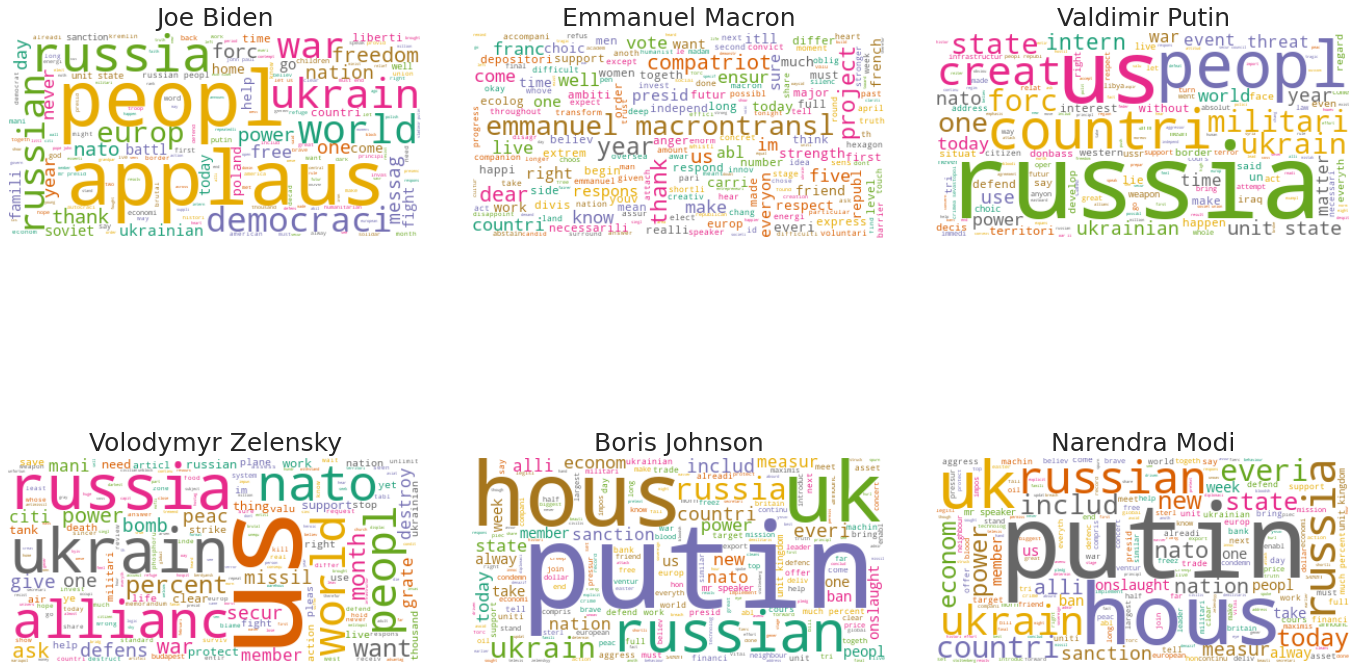

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
text1 = clean_interview.Speech[0]
wordcloud1 = WordCloud(background_color='white',colormap='Dark2').generate(text1)
plt.title('Joe Biden',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud1, interpolation='bilinear')

plt.subplot(2,3,2)
text2 = clean_interview.Speech[1]
wordcloud2 = WordCloud(background_color='white',colormap='Dark2').generate(text2)
plt.title('Emmanuel Macron',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud2, interpolation='bilinear')


plt.subplot(2,3,3)
text3 = clean_interview.Speech[2]
wordcloud3 = WordCloud(background_color='white',colormap='Dark2').generate(text3)
plt.title('Valdimir Putin',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud3, interpolation='bilinear')


plt.subplot(2,3,4)
text4 = clean_interview.Speech[3]
wordcloud4 = WordCloud(background_color='white',colormap='Dark2').generate(text4)
plt.title('Volodymyr Zelensky',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud4, interpolation='bilinear')


plt.subplot(2,3,5)
text5 = clean_interview.Speech[4]
wordcloud5 = WordCloud(background_color='white',colormap='Dark2').generate(text5)
plt.title('Boris Johnson',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud5, interpolation='bilinear')

plt.subplot(2,3,6)
text5 = clean_interview.Speech[4]
wordcloud5 = WordCloud(background_color='white',colormap='Dark2').generate(text5)
plt.title('Narendra Modi',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud5, interpolation='bilinear')

plt.tight_layout(pad=4.0)
plt.show()

# Analyzing the stance of each Journalist by using the TexBlob module



**Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.

**Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [ ]:
import plotly.express as px

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

clean_interview['polarity'] = clean_interview['Speech'].apply(pol)
clean_interview['subjectivity'] = clean_interview['Speech'].apply(sub)
clean_interview

,Speech,Head of government,polarity,subjectivity
0,pm cet presid thank thank thank pleas seat sea...,Joe Biden,0.067952,0.407000
1,speaker okay emmanuel macron take stage expect...,Emmanuel Macron,0.130661,0.478422
2,presid russia vladimir putin citizen russia fr...,Valdimir Putin,0.053567,0.438552
3,secretari gener presid welcom kyiv capit fight...,Volodymyr Zelensky,0.039053,0.414269
4,mr speaker come meet g leader join secretari g...,Boris Johnson,0.110986,0.395166
5,new delhi india yet advoc peac settlement ongo...,Narendra Modi,0.077339,0.261666


In [ ]:
px.scatter(clean_interview,x = 'polarity',y='subjectivity',color ='Head of government',
           labels={
                     "polarity": "<--Negative :: Positive--> (polarity)",
                     "subjectivity": "<--Facts :: Opinions--> (subjectivity)",
                     "species": "Species of Iris"
                 },template='ggplot2',title="Sentiment Analysis")

**Findings**


In [ ]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

   
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
list_pieces = []
for t in clean_s['Speech']:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['pm cet presid thank thank thank pleas seat seat laughter dont come stage thank much great honor mr presid tell your somewher thank mr presid afraid first word first public address first polish pope elect octob word would come defin pope john paul ii word would chang world john paul brought messag warsaw first trip back home pope june messag power power faith power resili power peopl face cruel brutal system govern messag help end soviet repress central land eastern europ year ago messag overcom cruelti brutal unjust war pope john paul brought messag soviet union rule iron fist behind iron curtain year later solidar movement took hold poland know couldnt tonight grate america around world lech wałęsa applaus remind phrase philosoph kierkegaard aith see best dark dark moment ten year later soviet union collaps poland central eastern europ would soon free noth battl freedom simpl easi long pain slog fought day month year decad emerg anew great battl freedom battl democraci autocraci li

In [ ]:
polarity_Speech = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_Speech.append(polarity_piece)
    
polarity_Speech

[[0.026000000000000002,
  0.3007575757575758,
  0.13324175824175824,
  -0.005555555555555554,
  -0.049015151515151505,
  0.1611111111111111,
  -0.04802827380952381,
  -0.0031746031746031737,
  0.05693889443889444,
  0.19507575757575754],
 [0.09,
  0.36190476190476195,
  0.044642857142857144,
  0.17857142857142858,
  0.046513605442176864,
  -0.1412878787878788,
  0.3,
  0.09722222222222221,
  0.37878787878787873,
  0.23434343434343433],
 [-0.03461538461538462,
  0.0013888888888888896,
  0.06499999999999999,
  0.09348484848484848,
  0.13637987012987013,
  -0.14345238095238097,
  0.1265530303030303,
  0.11989177489177487,
  0.16526669758812612,
  -0.2923611111111111],
 [0.22083333333333333,
  -0.0481060606060606,
  0.05000000000000001,
  -0.08787878787878789,
  -0.06122448979591836,
  0.04081632653061224,
  0.22000000000000003,
  -0.2,
  0.1,
  0.1572727272727273],
 [0.15833333333333335,
  0.6,
  -0.01944444444444444,
  0.014187327823691458,
  0.16852272727272727,
  0.12454545454545454,
 

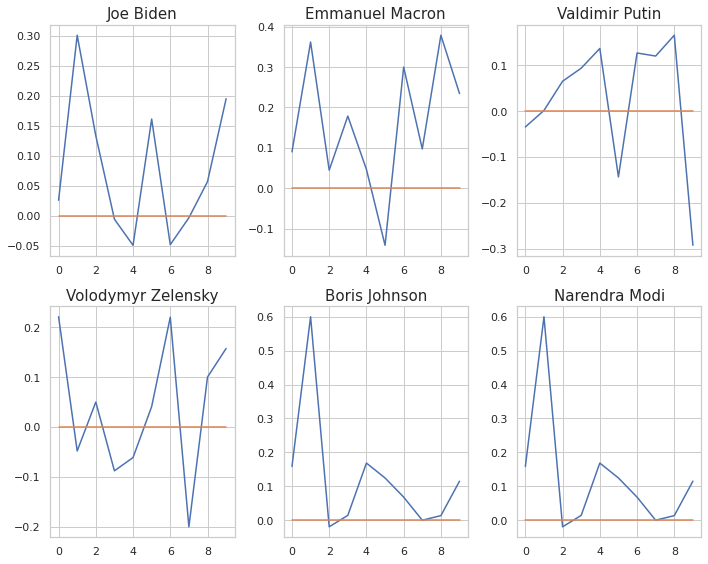

In [ ]:
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.plot(polarity_Speech[0])
plt.title(clean_s['Head of government'].index[0])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Joe Biden',fontsize=15)

plt.subplot(2,3,2)
plt.plot(polarity_Speech[1])
plt.title(clean_s['Head of government'].index[1])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Emmanuel Macron',fontsize=15)

plt.subplot(2,3,3)
plt.plot(polarity_Speech[2])
plt.title(clean_s['Head of government'].index[2])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Valdimir Putin',fontsize=15)

plt.subplot(2,3,4)
plt.plot(polarity_Speech[3])
plt.title(clean_s['Head of government'].index[3])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Volodymyr Zelensky',fontsize=15)

plt.subplot(2,3,5)
plt.plot(polarity_Speech[4])
plt.title(clean_s['Head of government'].index[4])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Boris Johnson',fontsize=15)

plt.subplot(2,3,6)
plt.plot(polarity_Speech[4])
plt.title(clean_s['Head of government'].index[4])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Narendra Modi',fontsize=15)


plt.tight_layout()